In [32]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
plt.style.use('seaborn-darkgrid')
#plt.style.use('dark_background')
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=16)
plt.rc('lines', markersize=16)
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

 


In [38]:
df = pd.read_csv('covid-variants.csv')
df['date'] = pd.to_datetime(df["date"])

df


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [39]:
print(df.isna().sum())
print('Duplicated',df.duplicated().sum())

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64
Duplicated 0


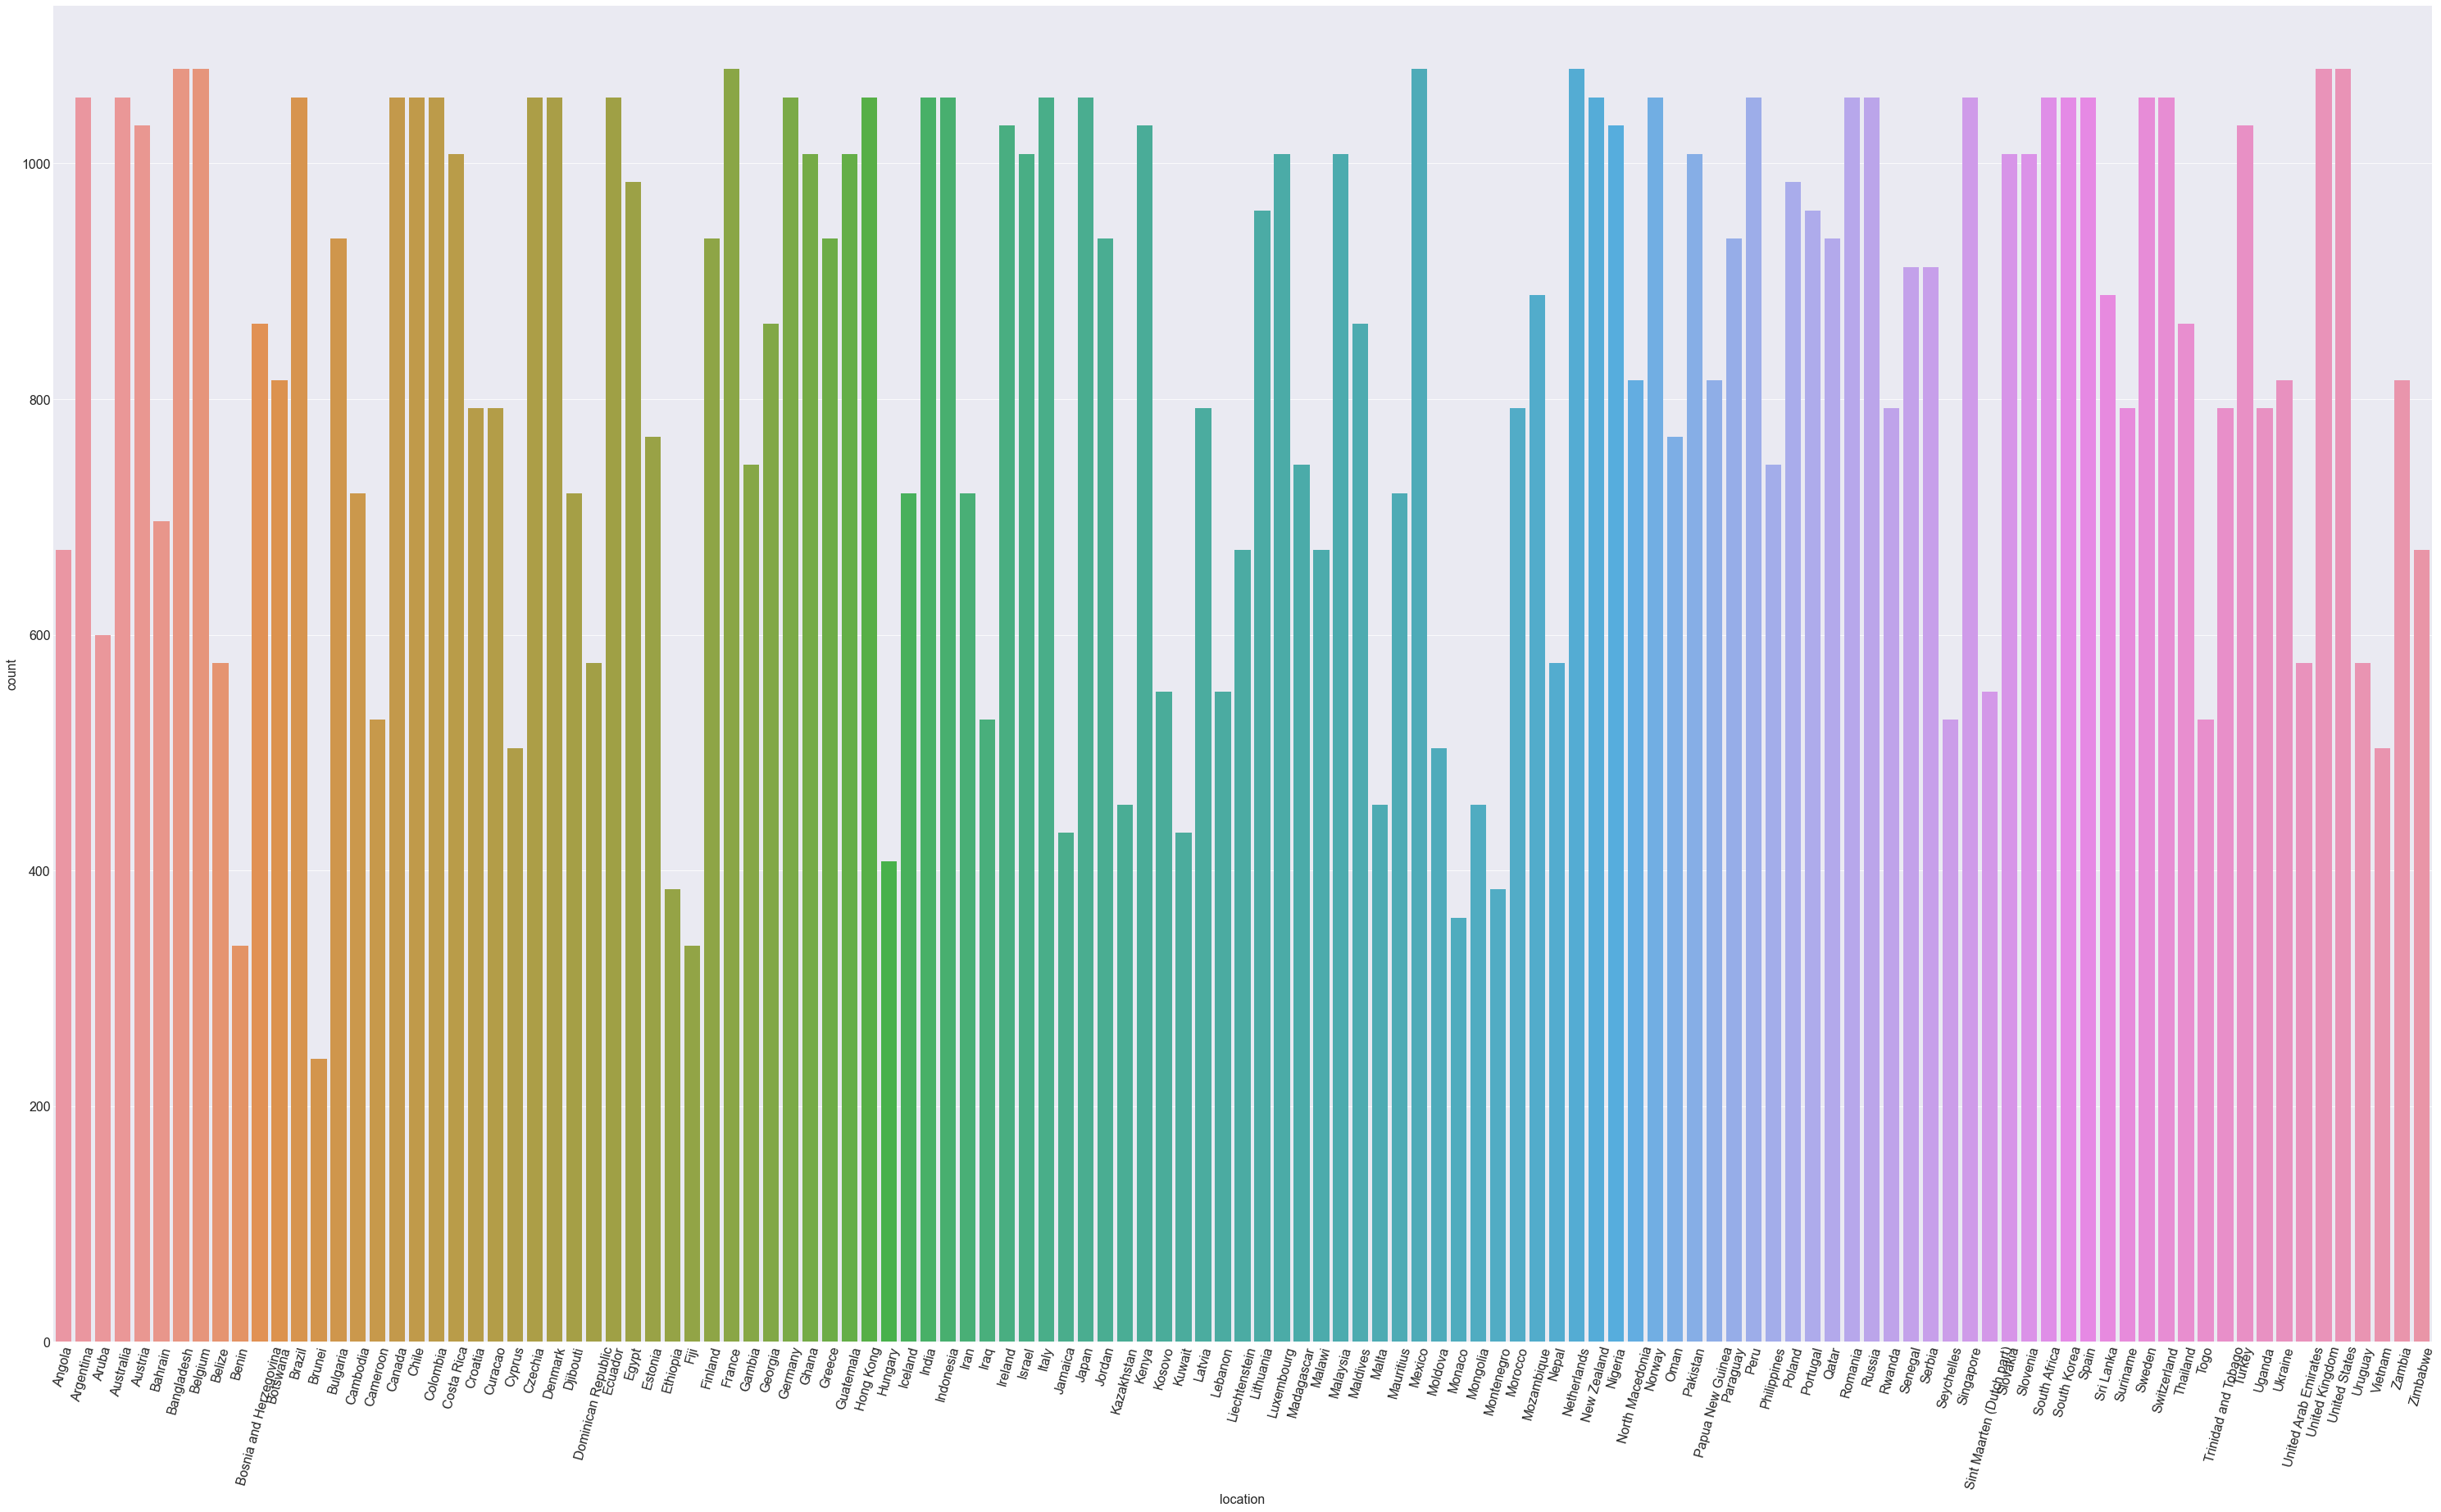

In [41]:
df.groupby(['location']).count()
sns.countplot(df['location'])
plt.xticks(rotation=75)
plt.show()

In [42]:
df.set_index("location", inplace=True)
df


,date,variant,num_sequences,perc_sequences,num_sequences_total
location,,,,,
Angola,2020-07-06,Alpha,0,0.0,3
Angola,2020-07-06,B.1.1.277,0,0.0,3
Angola,2020-07-06,B.1.1.302,0,0.0,3
Angola,2020-07-06,B.1.1.519,0,0.0,3
Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...
Zimbabwe,2021-11-01,Omicron,0,0.0,6
Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6


In [43]:
df_all = df.loc[['United States', 'Canada','Germany','Sweden','India','Japan']]


df_us = df.loc[['United States']]
df_can = df.loc[['Canada']]
df_ger = df.loc[['Germany']]
df_swe = df.loc[['Sweden']]
df_ind= df.loc[['India']]
df_japan = df.loc[['Japan']]


In [44]:
df_all

,date,variant,num_sequences,perc_sequences,num_sequences_total
location,,,,,
United States,2020-05-11,Alpha,0,0.00,5804
United States,2020-05-11,B.1.1.277,0,0.00,5804
United States,2020-05-11,B.1.1.302,0,0.00,5804
United States,2020-05-11,B.1.1.519,0,0.00,5804
United States,2020-05-11,B.1.160,0,0.00,5804
...,...,...,...,...,...
Japan,2021-12-27,Omicron,118,77.12,153
Japan,2021-12-27,S:677H.Robin1,0,0.00,153
Japan,2021-12-27,S:677P.Pelican,0,0.00,153


In [45]:
df_all.to_csv("Covid_Data6.csv",
                header = True)

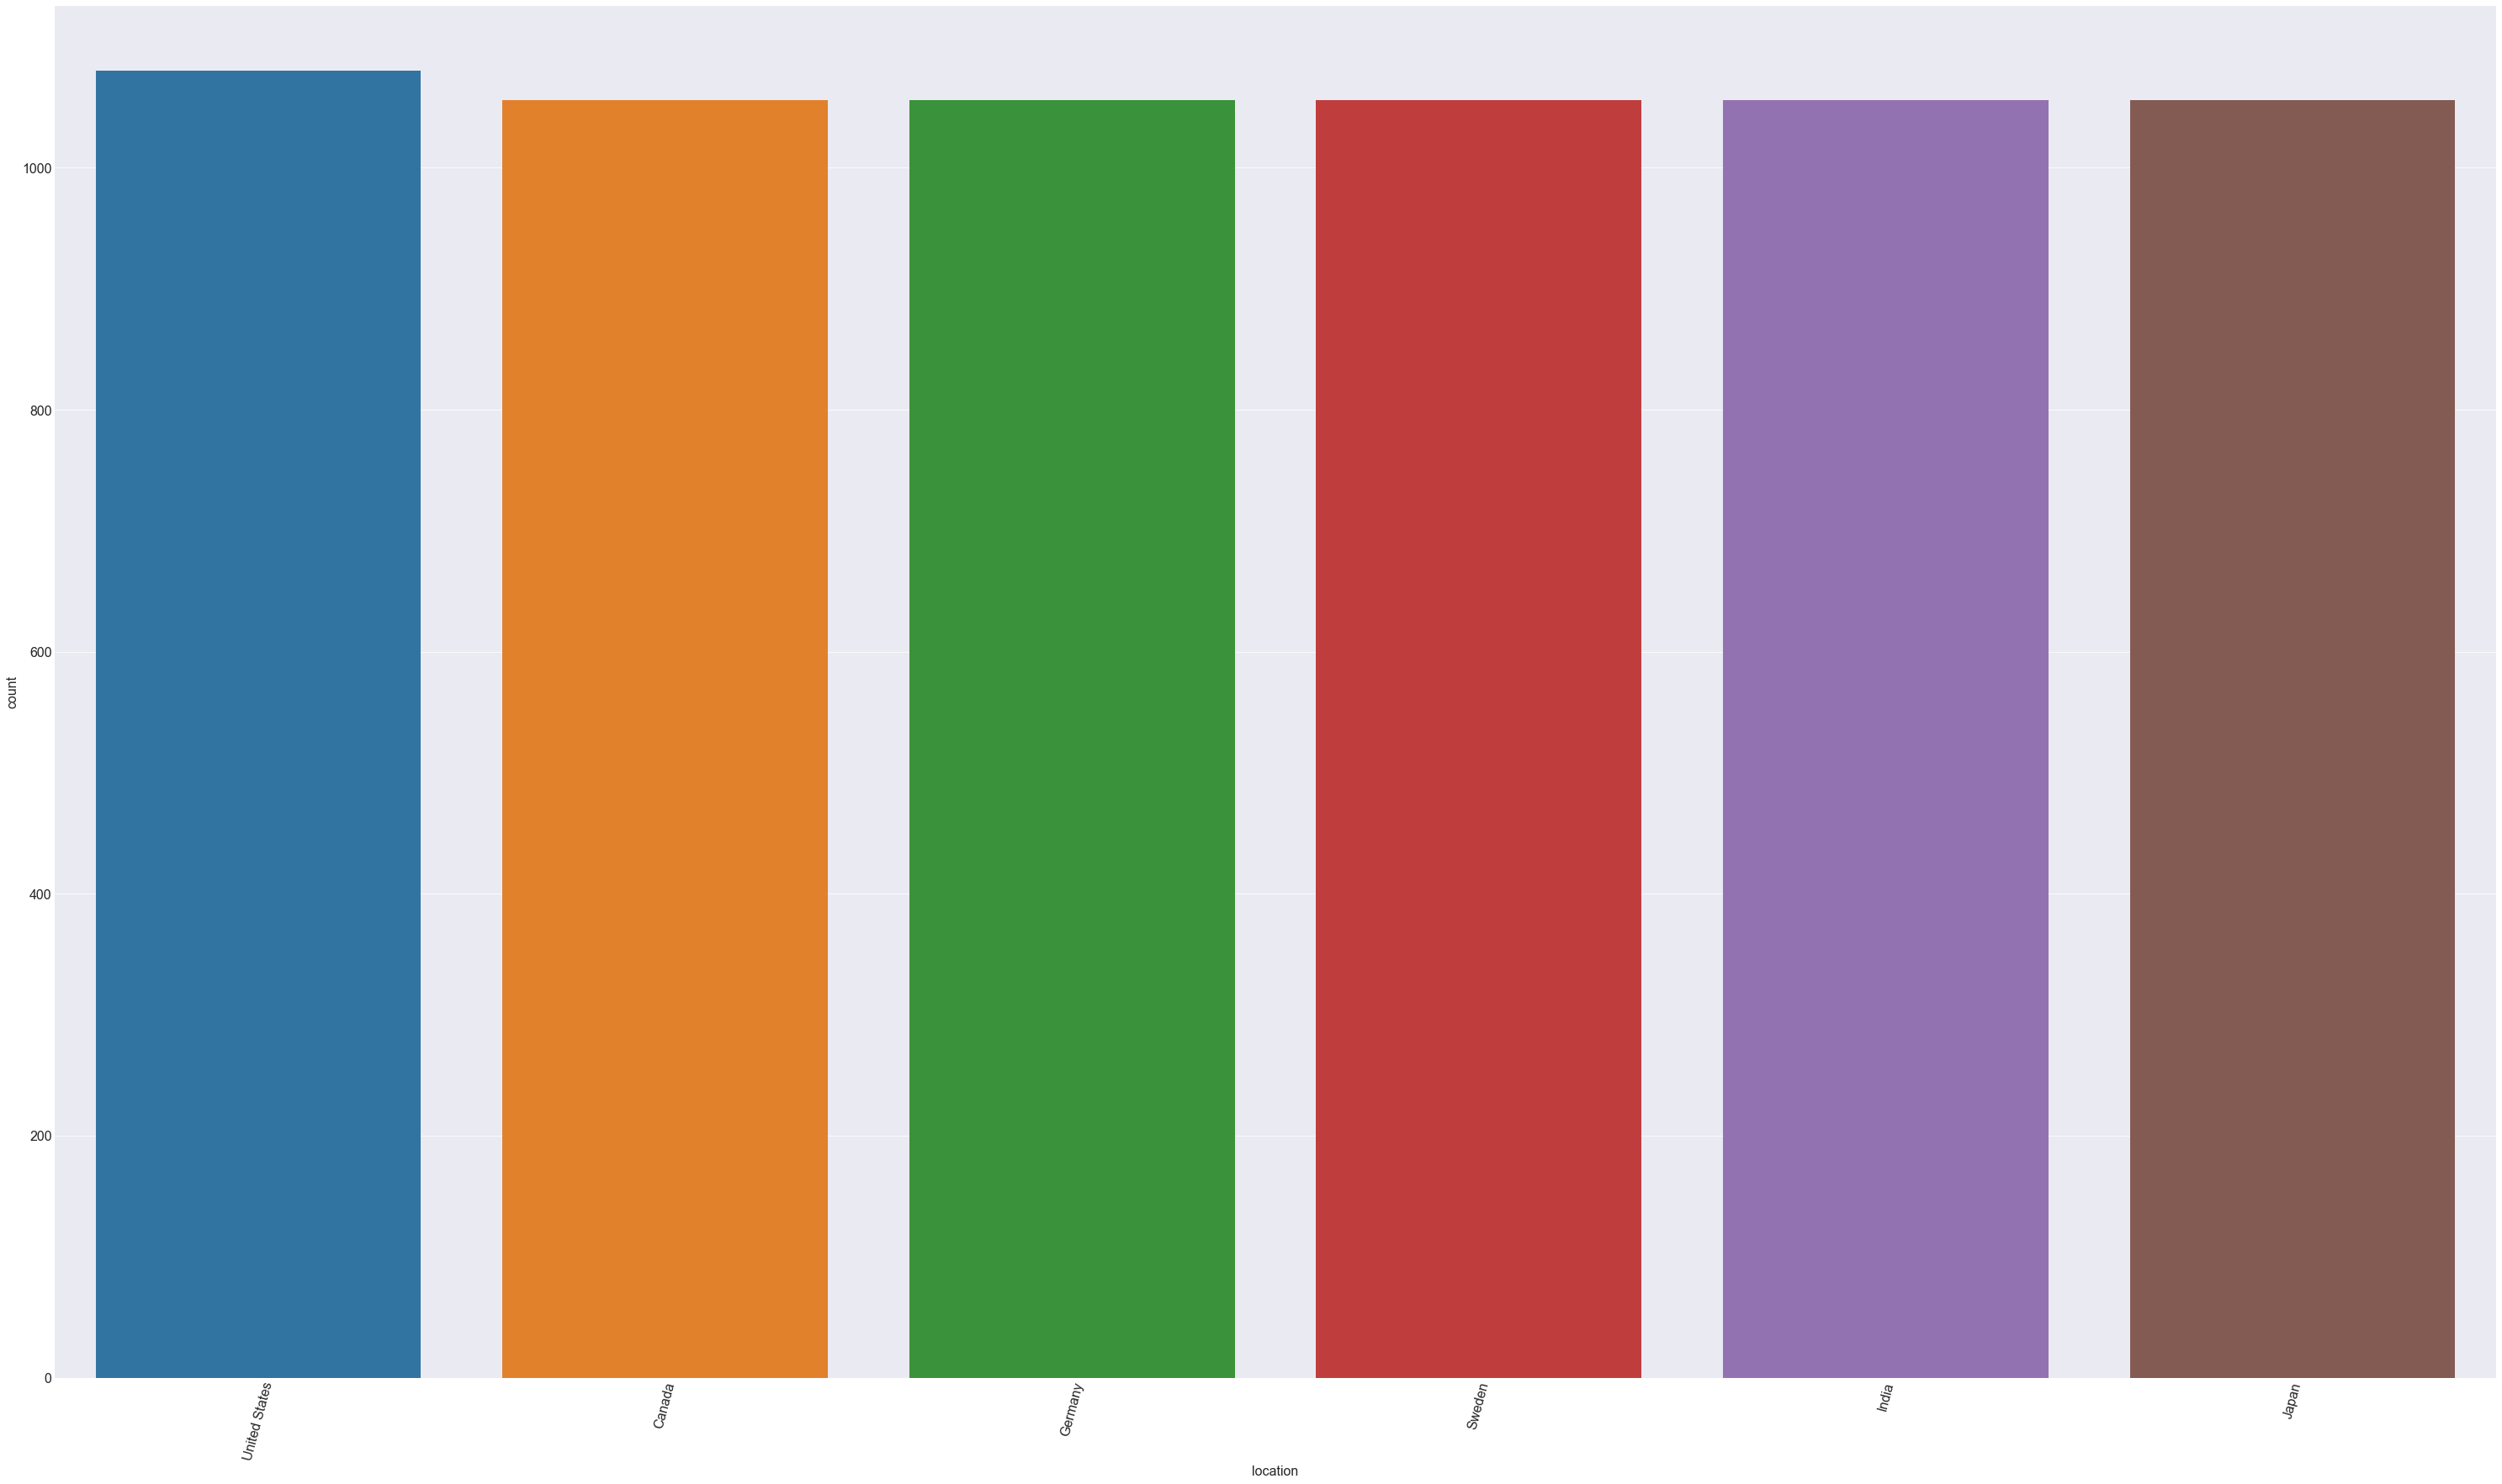

In [46]:
df_all.reset_index(inplace=True)
df_all.groupby('location').count()
sns.countplot(df_all['location'])
plt.xticks(rotation=75)
plt.rc('figure', figsize=(20,10))
plt.rc('font', size=35)
plt.rc('lines', markersize=22)







plt.show()
 
 

In [47]:
# Group Each Country by location and date together
sum_all_df = df_all.groupby(['location','date']).agg({'num_sequences_total': 'sum'}) 
sum_us_df = df_us.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_ger_df = df_ger.groupby(['location','date']).agg({'num_sequences_total': 'sum'}) 
sum_can_df = df_can.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_swe_df = df_swe.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_ind_df = df_ind.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_japan_df = df_japan.groupby(['location','date']).agg({'num_sequences_total': 'sum'})

 


In [48]:
sum_us_df

num_sequences_total
location      date                           
United States 2020-05-11               139296
              2020-05-25               113664
              2020-06-08                96840
              2020-06-22               145680
              2020-07-06               200904
              2020-07-20               242928
              2020-08-03               187224
              2020-08-17               143808
              2020-08-31               117312
              2020-09-14               104688
              2020-09-28               121848
              2020-10-12               138336
              2020-10-26               180840
              2020-11-09               300960
              2020-11-23               325464
              2020-12-07               318384
              2020-12-21               478464
              2021-01-04               508896
              2021-01-11               442824
              2021-01-25               919032
              2021-02-08               836472
              2021-02-22               862056
              2021-03-08               958440
              2021-03-22              1262760
              2021-04-05              1654128
              2021-04-19              1933008
              2021-05-03              1644984
              2021-05-17              1234176
              2021-05-31               693912
              2021-06-14               486792
              2021-06-28               534984
              2021-07-12               894096
              2021-07-26              1913112
              2021-08-09              3508080
              2021-08-23              3138096
              2021-09-06              3291816
              2021-09-20              3233232
              2021-10-04              2679840
              2021-10-18              2590080
              2021-11-01              2517192
              2021-11-15              2818056
              2021-11-29              2406744
              2021-12-13              2458320
              2021-12-27              1181640
              2022-01-05                  840

Text(0, 0.5, 'Cases Reported ')

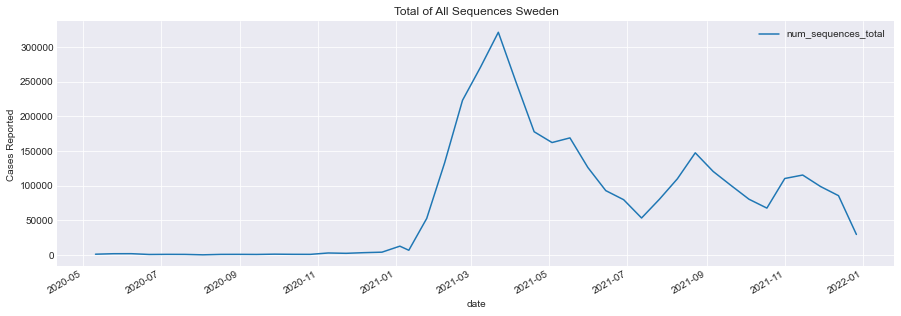

In [53]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_swe_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Total of All Sequences Sweden')
plt.ylabel("Cases Reported ") 

Text(0, 0.5, 'Cases Reported ')

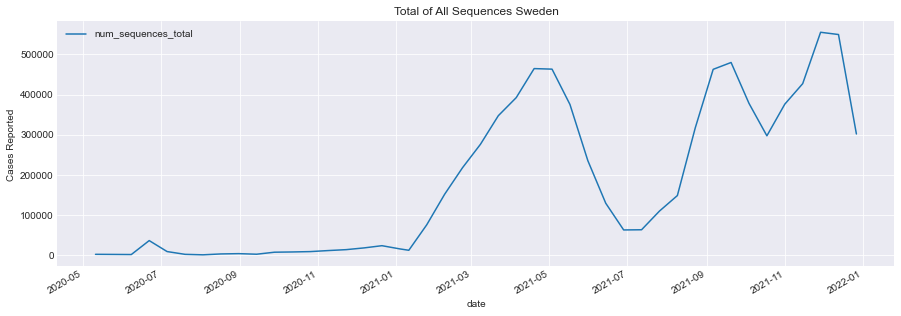

In [59]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_ger_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Total of All Sequences Sweden')
plt.ylabel("Cases Reported ") 

Text(0, 0.5, 'Cases Reported ')

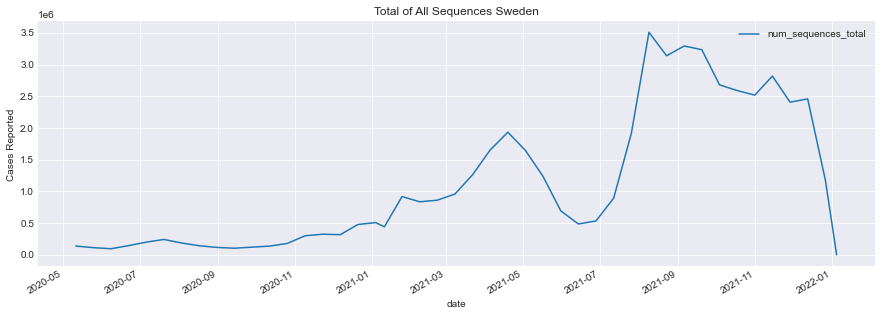

In [54]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_us_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Total of All Sequences Sweden')
plt.ylabel("Cases Reported ") 

Text(0, 0.5, 'Cases Reported ')

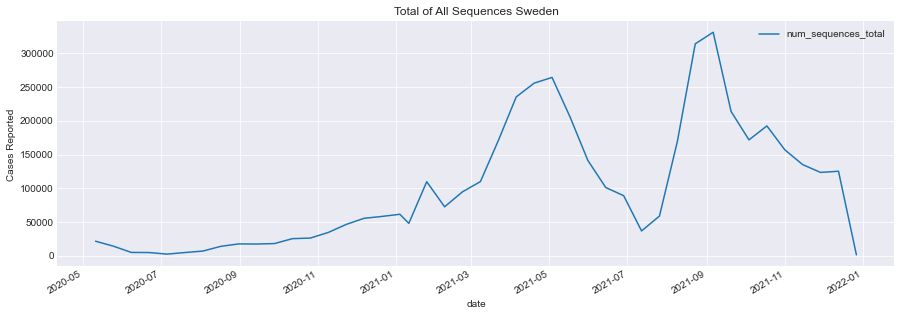

In [55]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_can_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Total of All Sequences Sweden')
plt.ylabel("Cases Reported ") 

Text(0, 0.5, 'Cases Reported ')

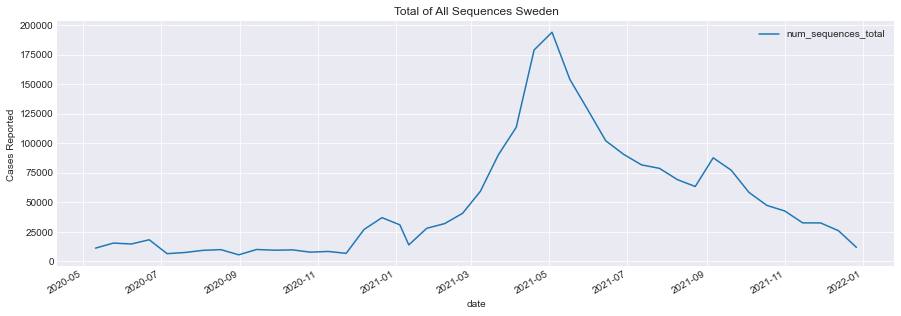

In [56]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_ind_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Total of All Sequences Sweden')
plt.ylabel("Cases Reported ") 

Text(0, 0.5, 'Cases Reported ')

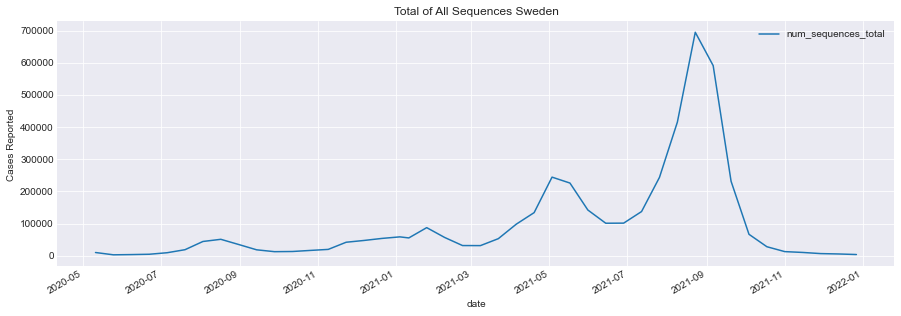

In [58]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_japan_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Total of All Sequences Sweden')
plt.ylabel("Cases Reported ") 

In [29]:
from datetime import datetime

sum_us_df.reset_index(inplace=True)

sum_us_df['date'] = pd.to_datetime(sum_us_df['date'])
sum_us_df.sort_values(by='date', ascending=True)



,index,location,date,num_sequences_total
23,23,United States,2020-05-11,139296
25,25,United States,2020-05-25,113664
31,31,United States,2020-06-08,96840
29,29,United States,2020-06-22,145680
35,35,United States,2020-07-06,200904
33,33,United States,2020-07-20,242928
38,38,United States,2020-08-03,187224
36,36,United States,2020-08-17,143808
39,39,United States,2020-08-31,117312
41,41,United States,2020-09-14,104688


In [30]:
sum_us_df.info

<bound method DataFrame.info of     index       location       date  num_sequences_total
0       0  United States 2021-01-11               442824
1       1  United States 2021-01-25               919032
2       2  United States 2021-01-04               508896
3       3  United States 2022-01-05                  840
4       4  United States 2020-10-12               138336
5       5  United States 2021-10-18              2590080
6       6  United States 2020-10-26               180840
7       7  United States 2021-10-04              2679840
8       8  United States 2021-11-01              2517192
9       9  United States 2021-11-15              2818056
10     10  United States 2020-11-23               325464
11     11  United States 2021-11-29              2406744
12     12  United States 2020-11-09               300960
13     13  United States 2021-12-13              2458320
14     14  United States 2020-12-21               478464
15     15  United States 2021-12-27              1181640

In [20]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_us_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences US')
plt.ylabel("Cases Reported (000)") 

Text(0, 0.5, 'Cases Reported (000)')

ValueError: Date ordinal 3683484.0 converts to 12055-01-14T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1080x360 with 1 Axes>

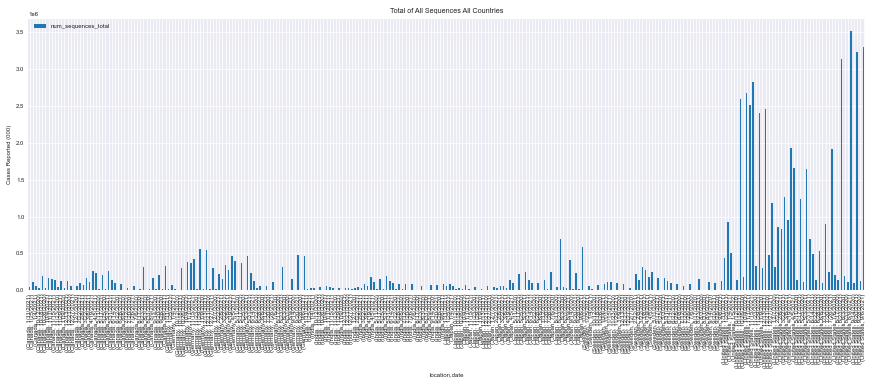

In [15]:
n=178
r = np.arange(n)
width = 0.25


# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=6)
plt.rc('lines', markersize=16) 
sum_all_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences All Countries')
plt.ylabel("Cases Reported (000)") 
#plt.xticks(r + width/4,['Canada','Germany','Sweden','United States'])
plt.legend()

Text(0, 0.5, 'Cases Reported (000)')

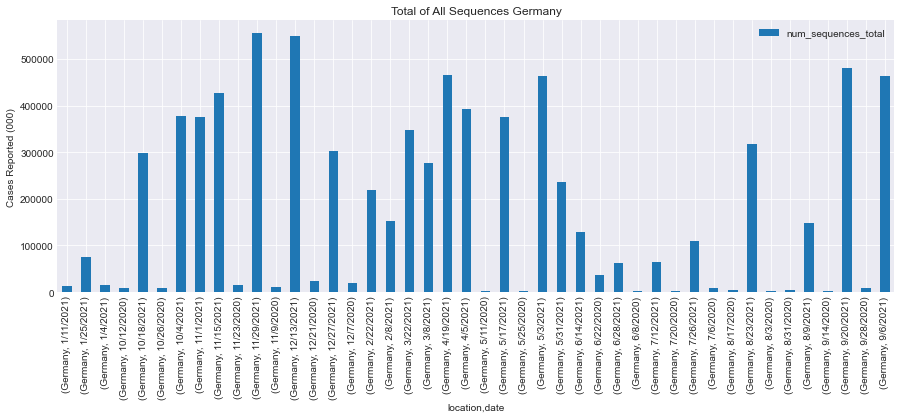

In [16]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_ger_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences Germany')
plt.ylabel("Cases Reported (000)") 

Text(0, 0.5, 'Cases Reported (000)')

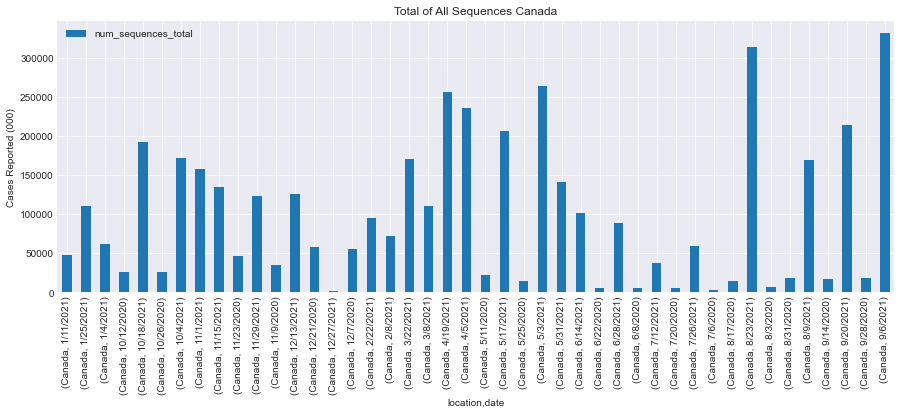

In [17]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_can_df.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences Canada')
plt.ylabel("Cases Reported (000)") 